Calibration time: 2.816377s 
FFTW Reconstruction time: 0.315216s 
FFTW Reconstruction time: 0.116000s 
rFFTW Reconstruction time: 0.107352s 
ocv Reconstruction time: 0.160424s 
ocvU Reconstruction time: 0.056808s 
CuPy Reconstruction time: 0.079197s 
FFTW Reconstructframe time: 0.057958s 
rFFTW Reconstructframe time: 0.031796s 
ocv Reconstruct frame time: 0.043378s 
ocvU Reconstruct frame time: 0.012050s 
CuPy Reconstructframe time: 0.009476s 
Calibration time: 1.803372s 
Reconstruction time: 11.614867s 
Reconstruction time: 11.451996s 
Batch Reconstruction compact time(CuPy): 1.023832s 


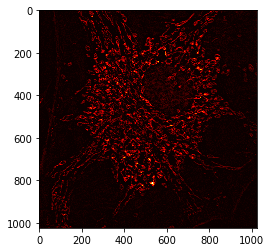

In [2]:
run hexSimProcessor_test.py

In [6]:
%load_ext line_profiler

In [35]:
lprun -u 0.001 -f h.calibrate h.calibrate(img1)

In [7]:
lprun -u 0.001 -f h._findCarrier h.calibrate(img1)

In [8]:
lprun -u 0.001 -f h.batchreconstruct_cupy h.batchreconstruct_cupy(img2)

In [9]:
lprun?

In [10]:
lprun -u 0.001 -f h._zoomf h.calibrate(img1)

In [ ]:
Timer unit: 0.001 s

Total time: 0.32928 s
File: C:\Users\hgong\PycharmProjects\HexSimProcessorInternal\hexSimProcessor.py
Function: _zoomf at line 547

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
   547                                               def _zoomf(self, in_arr, M, kx, ky, mag, kmax):
   548         3        156.1     52.0     47.4          resy = pyczt(in_arr, M, exp(-1j * 2 * pi / (mag * M)), exp(-1j * pi * (1 / mag - 2 * ky / kmax)))
   549         3        153.4     51.1     46.6          res = pyczt(resy.T, M, exp(-1j * 2 * pi / (mag * M)), exp(-1j * pi * (1 / mag - 2 * kx / kmax))).T
   550         3          0.2      0.1      0.1          kyarr = -kmax * (1 / mag - 2 * ky / kmax) / 2 + (kmax / (mag * (M))) * np.arange(0, M)
   551         3          0.1      0.0      0.0          kxarr = -kmax * (1 / mag - 2 * kx / kmax) / 2 + (kmax / (mag * (M))) * np.arange(0, M)
   552         3          0.0      0.0      0.0          dim = np.shape(in_arr)
   553                                                   # remove phase tilt from (0,0) offset in spatial domain
   554         3         10.0      3.3      3.0          res = res * (exp(1j * (kyarr) * dim[0] * pi / kmax)[:, np.newaxis])
   555         3          9.4      3.1      2.9          res = res * (exp(1j * (kxarr) * dim[0] * pi / kmax)[np.newaxis, :])
   556         3          0.0      0.0      0.0          return res, kxarr, kyarr

In [11]:
lprun -u 0.001 -f pyczt h.calibrate(img1)

In [ ]:
Timer unit: 0.001 s

Total time: 0.293697 s
File: C:\Users\hgong\PycharmProjects\HexSimProcessorInternal\pyczt.py
Function: pyczt at line 13

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
    13                                           def pyczt(x, k=None, w=None, a=None):
    14                                               # Chirp z-transform ported from Matlab implementation (see comment below)
    15                                               # By Mark Neil Apr 2020
    16                                               # %CZT  Chirp z-transform.
    17                                               # %   G = CZT(X, M, W, A) is the M-element z-transform of sequence X,
    18                                               # %   where M, W and A are scalars which specify the contour in the z-plane
    19                                               # %   on which the z-transform is computed.  M is the length of the transform,
    20                                               # %   W is the complex ratio between points on the contour, and A is the
    21                                               # %   complex starting point.  More explicitly, the contour in the z-plane
    22                                               # %   (a spiral or "chirp" contour) is described by
    23                                               # %       z = A * W.^(-(0:M-1))
    24                                               # %
    25                                               # %   The parameters M, W, and A are optional; their default values are
    26                                               # %   M = length(X), W = exp(-j*2*pi/M), and A = 1.  These defaults
    27                                               # %   cause CZT to return the z-transform of X at equally spaced points
    28                                               # %   around the unit circle, equivalent to FFT(X).
    29                                               # %
    30                                               # %   If X is a matrix, the chirp z-transform operation is applied to each
    31                                               # %   column.
    32                                               # %
    33                                               # %   See also FFT, FREQZ.
    34                                               #
    35                                               # %   Author(s): C. Denham, 1990.
    36                                               # %   	   J. McClellan, 7-25-90, revised
    37                                               # %   	   C. Denham, 8-15-90, revised
    38                                               # %   	   T. Krauss, 2-16-93, updated help
    39                                               # %   Copyright 1988-2002 The MathWorks, Inc.
    40                                               # %       $Revision: 1.7.4.1 $  $Date: 2007/12/14 15:04:15 $
    41                                               #
    42                                               # %   References:
    43                                               # %     [1] Oppenheim, A.V. & R.W. Schafer, Discrete-Time Signal
    44                                               # %         Processing,  Prentice-Hall, pp. 623-628, 1989.
    45                                               # %     [2] Rabiner, L.R. and B. Gold, Theory and Application of
    46                                               # %         Digital Signal Processing, Prentice-Hall, Englewood
    47                                               # %         Cliffs, New Jersey, pp. 393-399, 1975.
    48                                           
    49         6          0.0      0.0      0.0      olddim = x.ndim
    50                                           
    51         6          0.0      0.0      0.0      if olddim == 1:
    52                                                   x = x[:, np.newaxis]
    53                                           
    54         6          0.0      0.0      0.0      (m, n) = x.shape
    55         6          0.0      0.0      0.0      oldm = m
    56                                           
    57         6          0.0      0.0      0.0      if m == 1:
    58                                                   x = x.transpose()
    59                                                   (m, n) = x.shape
    60                                           
    61         6          0.0      0.0      0.0      if k is None:
    62                                                   k = len(x)
    63         6          0.0      0.0      0.0      if w is None:
    64                                                   w = np.exp(-1j * 2 * math.pi / k)
    65         6          0.0      0.0      0.0      if a is None:
    66                                                   a = 1.
    67                                           
    68                                               # %------- Length for power-of-two fft.
    69                                           
    70         6          0.1      0.0      0.0      nfft = int(2**np.ceil(math.log2(abs(m+k-1))))
    71                                           
    72                                               # %------- Premultiply data.
    73                                           
    74         6          0.1      0.0      0.0      kk = np.arange(-m+1, max(k, m))[:, np.newaxis]
    75         6          0.2      0.0      0.1      kk2 = (kk ** 2) / 2
    76         6          1.9      0.3      0.6      ww = w ** kk2   # <----- Chirp filter is 1./ww
    77         6          0.1      0.0      0.0      nn = np.arange(0, m)[:, np.newaxis]
    78         6          0.9      0.2      0.3      aa = a ** (-nn)
    79         6          0.2      0.0      0.1      aa = aa * ww[m+nn-1, 0]
    80         6         16.0      2.7      5.4      y = x * aa
    81                                           
    82                                               # %------- Fast convolution via FFT.
    83                                           
    84         6        130.6     21.8     44.5      fy = fft.fft(y, nfft, axis=0)
    85         6          1.1      0.2      0.4      fv = fft.fft(1 / ww[0: k-1+m], nfft, axis=0)   # <----- Chirp filter.
    86         6         37.9      6.3     12.9      fy = fy * fv
    87         6         80.2     13.4     27.3      g = fft.ifft(fy, axis=0)
    88                                           
    89                                               # %------- Final multiply.
    90                                           
    91         6         24.3      4.1      8.3      g = g[m-1:m+k-1, :] * ww[m-1:m+k-1]
    92                                           
    93         6          0.0      0.0      0.0      if oldm == 1:
    94                                                   g = g.transpose()
    95                                           
    96         6          0.0      0.0      0.0      if olddim == 1:
    97                                                   g = g.squeeze()
    98                                           
    99         6          0.0      0.0      0.0      return g